In [46]:
import importlib
import preprocessing
importlib.reload(preprocessing)
from preprocessing import *


train_loader,val_loader=create_dataloader((16,16))




In [17]:
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, inputs, targets):
        # Flatten the tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        # Calculate intersection and union
        intersection = (inputs * targets).sum()
        dice = (2. * intersection + self.smooth) / (inputs.sum() + targets.sum() + self.smooth)
        
        return 1 - dice

In [22]:
import torch
import train 
importlib.reload(train)
from train import training_loop


    

model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

# Define the optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)
#loss_fn = torch.nn.CrossEntropyLoss()
loss_fn= DiceLoss()
unet_metrics=training_loop(model, optimizer, loss_fn, train_loader, val_loader, num_epochs=3)
# Train the model


Using cache found in /Users/anton_heden/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


Starting training


100%|██████████| 376/376 [00:26<00:00, 14.15it/s]


Epoch 1/3: Train loss: 0.657, Train acc.: 0.880, Val. loss: 0.632, Val. acc.: 0.891


100%|██████████| 376/376 [00:25<00:00, 14.61it/s]


Epoch 2/3: Train loss: 0.609, Train acc.: 0.894, Val. loss: 0.583, Val. acc.: 0.897


100%|██████████| 376/376 [00:25<00:00, 14.59it/s]


Epoch 3/3: Train loss: 0.571, Train acc.: 0.897, Val. loss: 0.568, Val. acc.: 0.907


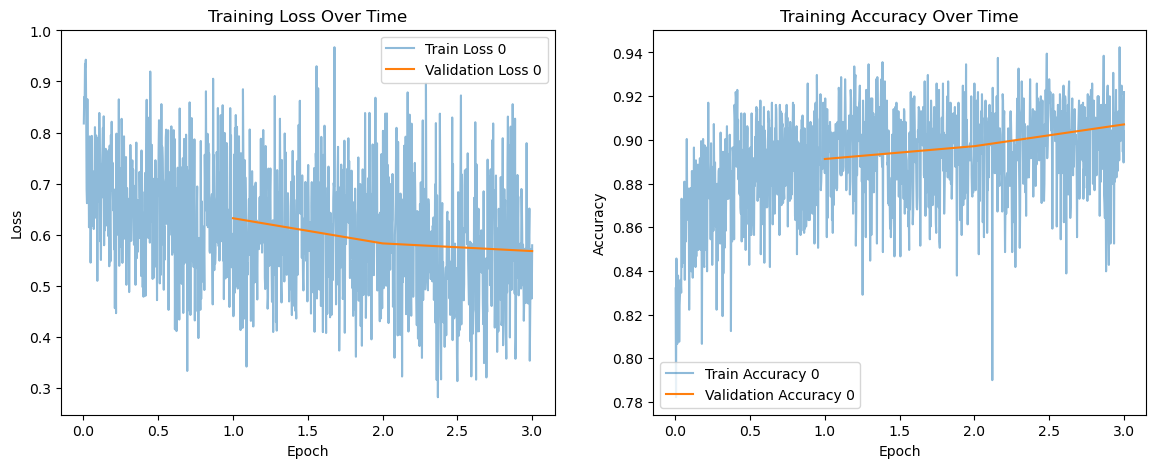

In [58]:
import visualisation
importlib.reload(visualisation)
from visualisation import *
plot_training([unet_metrics])